In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#=========== general settings ============================#
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.subplot.wspace"] = 0.4

plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['font.sans-serif'] ='Arial'#使用するフォント
plt.rcParams["font.size"] = 30
#plt.rcParams['mathtext.rm'] ='sans'#使用するフォント
#plt.rcParams['mathtext.default'] ='rm'#使用するフォント

plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams["xtick.major.pad"] = 19.0
plt.rcParams["ytick.major.pad"] = 16.0
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["ytick.major.size"] = 10

plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ
plt.rcParams["axes.labelpad"] = 10
#==================================================================#

In [17]:
def ASR( G, K, s11, s22, s33, s12, s13, s23, p0,ts, tv):
    #n = np.matrix([[n11,n12,n13,n14,n15,n16, n17, n18, n19],[n21,n22,n23,n24,n25,n26, n27, n28, n29],[n31,n32,n33,n34,n35,n36, n37, n38, n39]])
    t = 25
    nn = np.matrix([[1],[1],[0]]) 
    n = nn / np.linalg.norm(nn)

    Jav = (1-np.exp(-t/tv))/(3*K*10**3)
    Jas = (1-np.exp(-t/ts))/(2*G*10**3)
    
    nTn = (s11*n[0]*n[0] + s22*n[1]*n[1] + s33*n[2]*n[2]
           + 2*s12*n[0]*n[1] + 2*s23*n[1]*n[2] + 2*s13*n[0]*n[2]
          )
    
    sm = (1.0/3.0)*(s11 + s22 + s33)
  
    es = (nTn - sm)*Jas
    ev = (sm - p0)*Jav
    
    e = es + ev
    
    return e*10**6

In [18]:
problem = {
    'num_vars': 11,
    'names': [ 'G', 'K','s11', 's22', 's33', 's12', 's13', 's23', 'p0',  'ts', 'tv'],
    'bounds': [[0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 100],
               [0, 50],
               [0, 50]
               ]
}

In [19]:
param_values = saltelli.sample(problem, 100000)

In [20]:
Y2 = np.zeros([param_values.shape[0]])

for i, (G, K, s11, s22, s33, s12, s13, s23, p0, ts, tv) in enumerate(param_values):
    Y2[i] = ASR(G, K,s11, s22, s33, s12, s13, s23, p0,  ts, tv)
        
Si2 = sobol.analyze(problem, Y2, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
G 1.135999 0.829300 0.583655 0.299079
K -0.009861 0.062300 0.014520 0.096326
s11 0.000007 0.000046 0.002455 0.019951
s22 0.000010 0.000069 0.003214 0.012743
s33 0.000004 0.000025 0.004408 0.019069
s12 0.000045 0.000199 0.043746 0.163734
s13 0.000000 0.000000 0.000000 0.000000
s23 0.000000 0.000000 0.000000 0.000000
p0 0.000011 0.000084 0.010115 0.079831
ts 0.000017 0.000064 0.030481 0.102755
tv -0.000000 0.000021 0.000867 0.005490

Parameter_1 Parameter_2 S2 S2_conf
G K -1.015125 1.243428
G s11 -1.019871 1.219140
G s22 -1.013586 1.255769
G s33 -1.006197 1.287020
G s12 -1.001322 1.356790
G s13 -1.015130 1.243407
G s23 -1.015130 1.243407
G p0 -1.015131 1.243404
G ts -1.015211 1.263474
G tv -1.015131 1.243408
K s11 0.016804 0.109188
K s22 0.014233 0.087947
K s33 0.019817 0.125968
K s12 0.015336 0.093111
K s13 0.015334 0.093107
K s23 0.015334 0.093107
K p0 0.021610 0.130981
K ts 0.015334 0.093107
K tv 0.014368 0.082418
s11 s22 -0.000004 0.000039
s11 s33 -0.0

<BarContainer object of 11 artists>

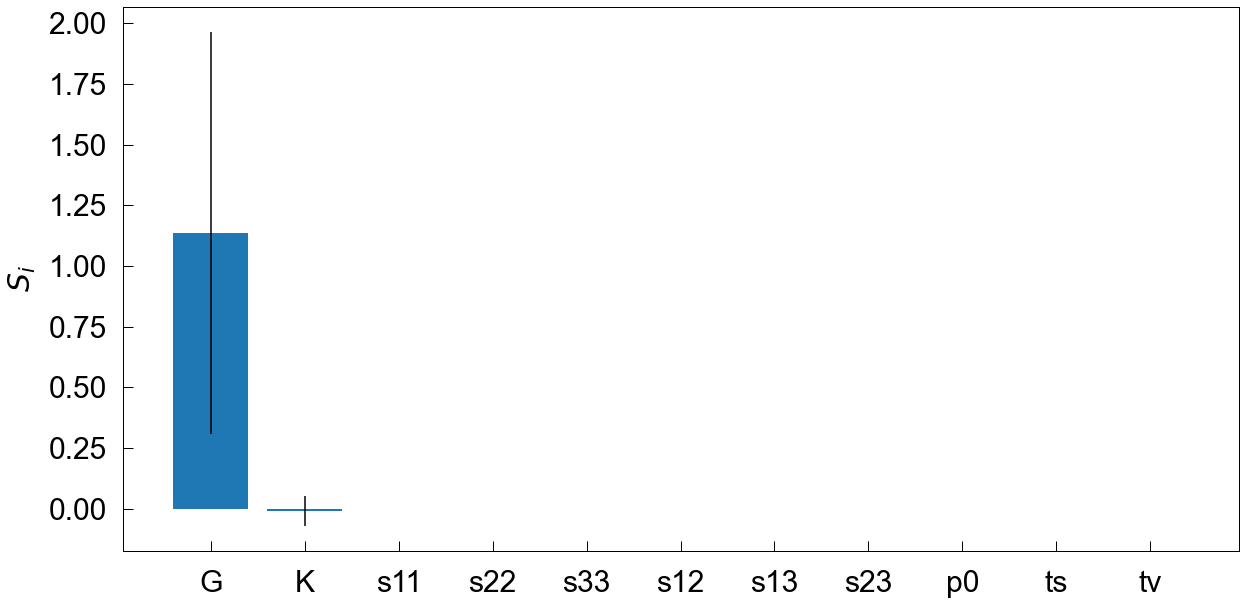

In [23]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{i}$')
plt.bar(x, Si2['S1'], yerr = Si2['S1_conf'])

In [10]:
Y = np.zeros([param_values.shape[0]])

for i, (G, K, s11, s22, s33, s12, s13, s23, p0, ts, tv) in enumerate(param_values):
    Y[i] = ASR(G, K,s11, s22, s33, s12, s13, s23, p0,  ts, tv)
        
Si = sobol.analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
G 0.062916 0.333593 0.504450 0.324351
K -0.393724 0.463605 0.579720 0.281630
s11 0.000951 0.000445 0.593492 0.524280
s22 -0.000104 0.000119 0.364213 0.455562
s33 0.000066 0.000107 0.175985 0.138053
s12 0.000000 0.000000 0.000000 0.000000
s13 0.000000 0.000000 0.000000 0.000000
s23 0.000000 0.000000 0.000000 0.000000
p0 0.000291 0.000266 0.403851 0.344649
ts 0.000001 0.000045 0.026531 0.027548
tv 0.000007 0.000050 0.034612 0.026127

Parameter_1 Parameter_2 S2 S2_conf
G K -0.013369 0.386108
G s11 0.515752 0.605678
G s22 -0.139528 0.486987
G s33 0.083378 0.443697
G s12 -0.013555 0.386102
G s13 -0.013555 0.386102
G s23 -0.013555 0.386102
G p0 -0.013464 0.386057
G ts -0.032667 0.382128
G tv -0.013590 0.386093
K s11 0.670991 0.541198
K s22 0.568409 0.552273
K s33 0.791340 0.538353
K s12 0.612329 0.479948
K s13 0.612329 0.479948
K s23 0.612329 0.479948
K p0 0.862892 0.651901
K ts 0.612314 0.479945
K tv 0.573765 0.499075
s11 s22 -0.000276 0.000280
s11 s33 -0.000

<BarContainer object of 11 artists>

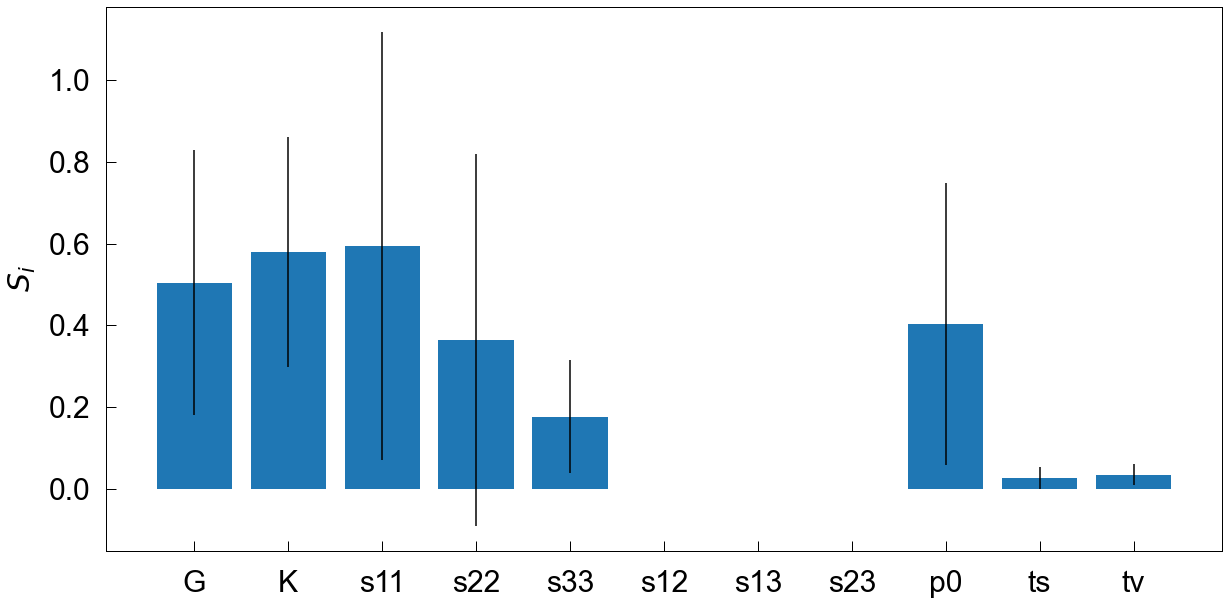

In [13]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{i}$')
plt.bar(x, Si['ST'], yerr = Si['ST_conf'])

<BarContainer object of 11 artists>

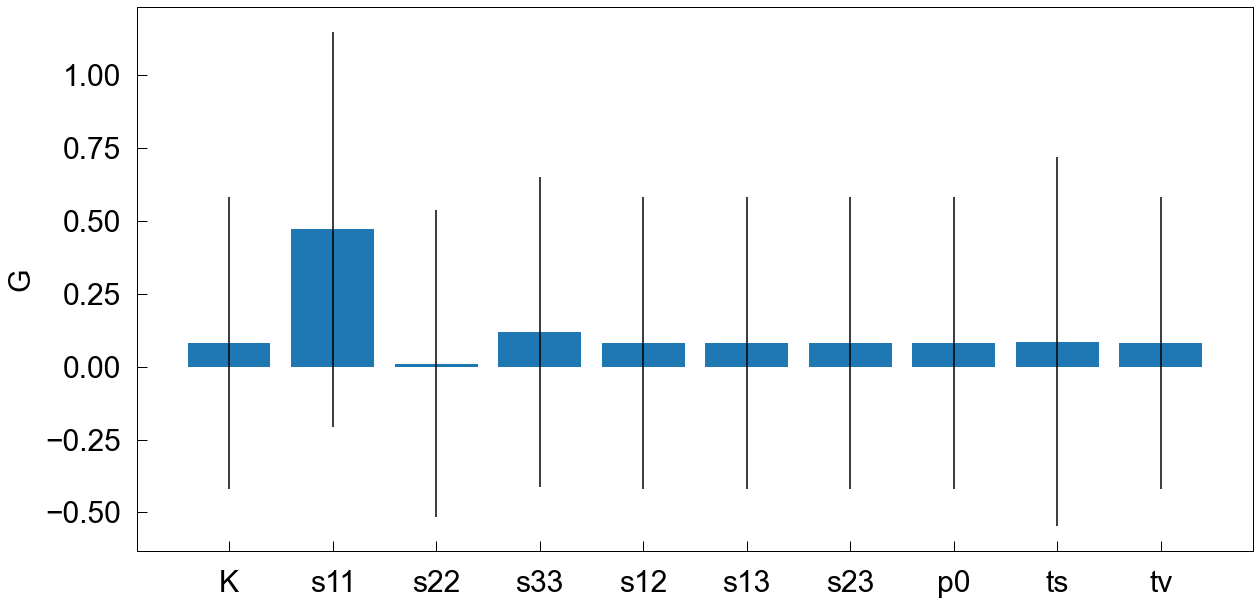

In [76]:
j = 0

x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel(problem["names"][j])
plt.bar(x, Si['S2'][j], yerr = Si['S2_conf'][j])

<BarContainer object of 11 artists>

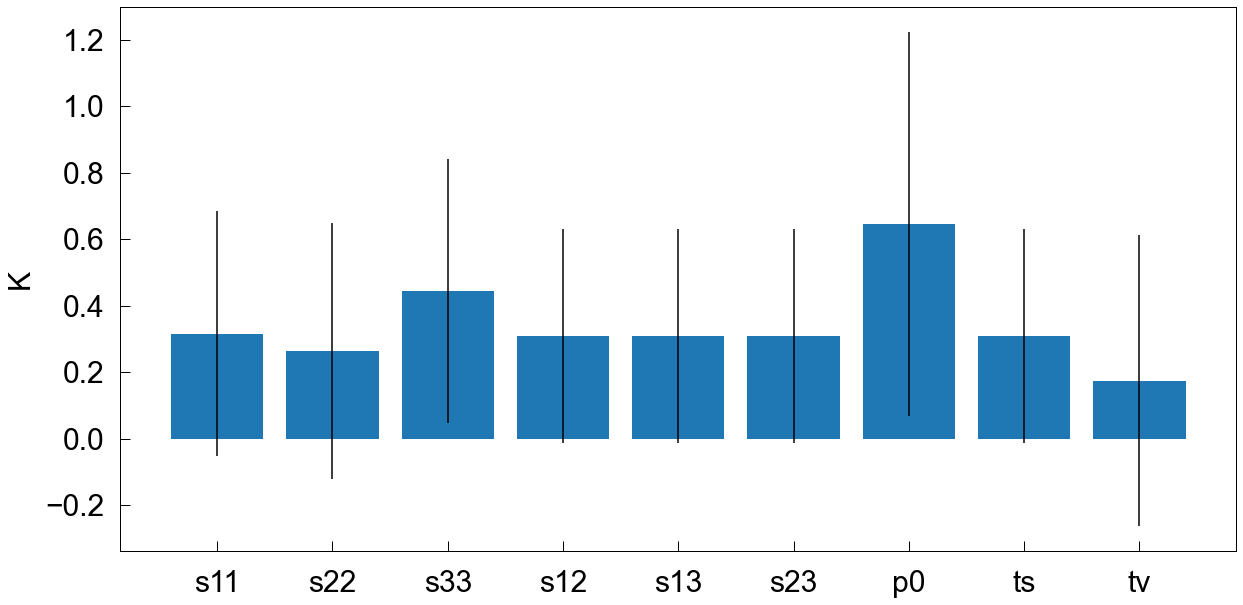

In [77]:
j = 1

x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel(problem["names"][j])
plt.bar(x, Si['S2'][j], yerr = Si['S2_conf'][j])

<BarContainer object of 11 artists>

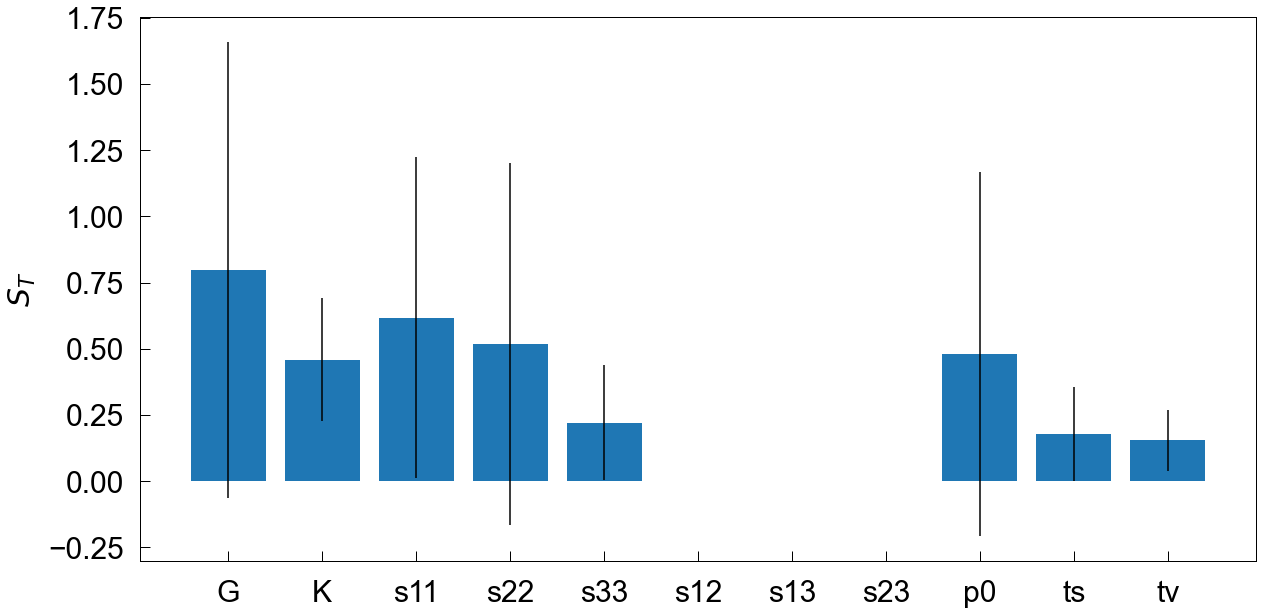

In [79]:
x = np.arange(problem['num_vars'])
plt.xticks(x, problem['names'])
plt.ylabel('$S_{T}$')
plt.bar(x, Si['ST'], yerr = Si['ST_conf'])